In [19]:
import midynet
import midynet.util.display as display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pathlib

display.setup_dir("./")

plot = midynet.metrics.Statistics.plot

In [15]:
all_dynamics = ["ising", "sis", "cowan"]

path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/figure3")

small_exp = {}
for dynamics in all_dynamics:
    small_exp[dynamics] = {}
    small_exp[dynamics]["exact"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.exact/config.pickle")
#     small_exp[dynamics]["annealed"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.annealed")
#     small_exp[dynamics]["meanfield"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.meanfield")

large_exp = {}
for dynamics in all_dynamics:
    large_exp[dynamics] = {}
#     small_exp[dynamics]["annealed"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.annealed")
#     small_exp[dynamics]["meanfield"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.meanfield")

if dynamics == "sis":
    xlabel = r"Infection probability $[\alpha]$"
elif dynamics == "cowan":
    xlabel = r"Activity gain $[\nu\langle k \rangle]$"
elif dynamics == "ising":
    xlabel = r"Coupling $[J\langle k \rangle]$"

# if dynamics == "sis":
#     xmin, xmax = 0, 1
# else:
#     xmin, xmax = 0, 4
# ymin, ymax = 0, 1.1



titles = {"ising": r"\textbf{Glauber}", "sis": r"\textbf{SIS}", "cowan": r"\textbf{Cowan}"}
couplingLabels = {"ising": r"J\langle k \rangle", "sis": r"\frac{\alpha \langle k \rangle}{\beta}", "cowan": r"\nu\langle k \rangle"}

xlabel1 = r"Number of time steps"
xlabel2 = {"ising": r"Coupling $[J\langle k \rangle$]", "sis": r"Infection prob. $[\frac{\alpha \langle k \rangle}{\beta}]$", "cowan": r"Activity gain $[\nu\langle k \rangle]$"}

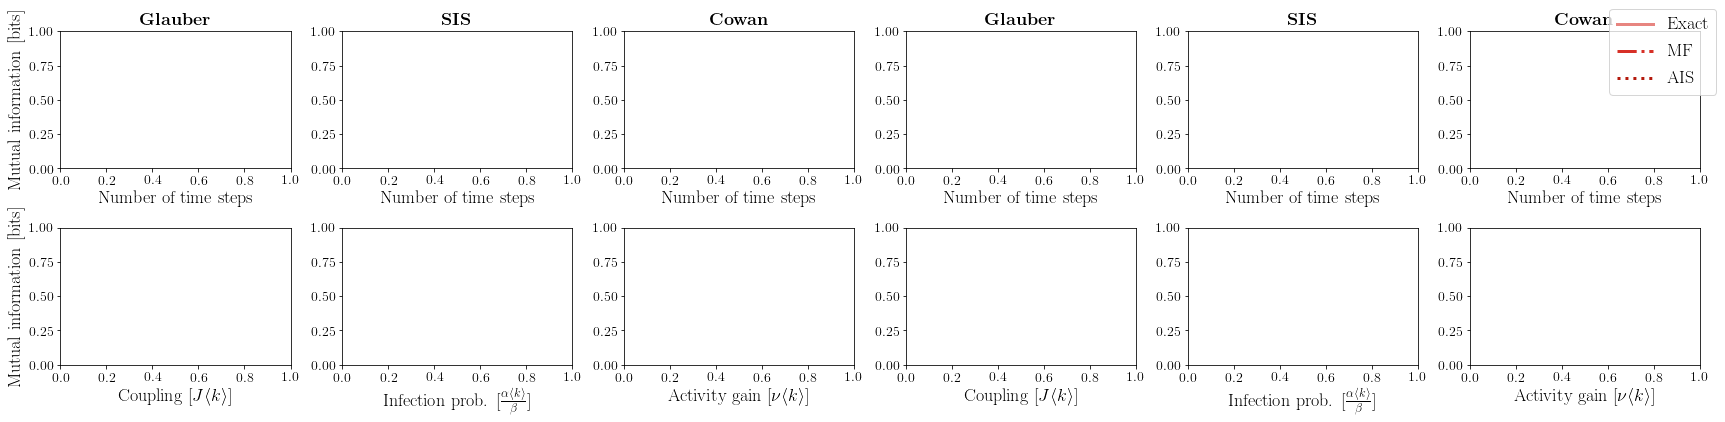

In [20]:
fig, ax = plt.subplots(2, 6, figsize=(24, 6))

for i, dynamics in enumerate(all_dynamics):
    T = small_exp[dynamics]["exact"].config.dynamics.num_steps
    ax[0, i].set_title(titles[dynamics], fontsize=18)
    ax[0, i].set_xlabel(xlabel1, fontsize=18)
    if i == 0:
        ax[0, i].set_ylabel(r"Mutual information [bits]", fontsize=18)
        
        
    ax[1, i].set_xlabel(xlabel2[dynamics], fontsize=18)
    if i == 0:
        ax[1, i].set_ylabel(r"Mutual information [bits]", fontsize=18)

for i, dynamics in enumerate(all_dynamics):
    i+=3
    T = small_exp[dynamics]["exact"].config.dynamics.num_steps
    ax[0, i].set_title(titles[dynamics], fontsize=18)
    ax[0, i].set_xlabel(xlabel1, fontsize=18)
    if i == 0:
        ax[0, i].set_ylabel(r"Mutual information [bits]", fontsize=18)
        
        
    ax[1, i].set_xlabel(xlabel2[dynamics], fontsize=18)
    if i == 0:
        ax[1, i].set_ylabel(r"Mutual information [bits]", fontsize=18)

handles = [
    Line2D([0], [0], linestyle="-", marker="None", color=display.light_colors["red"], linewidth=3, label=r"Exact"),
    Line2D([0], [0], linestyle="-.", marker="None", color=display.med_colors["red"], linewidth=3, label=r"MF"),
    Line2D([0], [0], linestyle="dotted", marker="None", color=display.dark_colors["red"], linewidth=3, label=r"AIS"),
]
fig.legend(handles=handles, loc="upper right", fontsize=18)

plt.tight_layout()

In [9]:
T

[10, 100, 500]